Missing Values:
> ->Missing Values occurs in a data set when some of the information is not stored for a variable. There are three mechanism

1) Missing Completely at Random (MCAR):
> ->The probability of  value being missing is unrelated to both the observed data and the missing data

  > ->If the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing

2) Missing at random (MAR)
> ->It is a type of missing data mechanism where the probability of the value being missing depends on the observed data, but not on the missing data itself

> -> The missing data values are systematically related to the observed data, but not to the missing data

3) Missing data not at random (MNAR)
> -> It is a mechanism where the probability of missing values depends on the values of the missing data itself

> -> If the data is MNAR then the missingness is not at random and is dependant on unobserved or unmeasured factors that are associated with the missing values

In [2]:
from random import randint

# Examples
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# checking missing values
df.isnull()
# wherever we are receiving true that means that value is NULL
df.isnull().sum()
# this shoes that in which column how many NULL values are present

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Delete the rows or data point to handle the missing values
# the problem in this method is that you will loose a whole lot of data
df.dropna().shape
# as we can see approx 600 rows got deleted leading to a very big data loss

# Deleting column wise as deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


# Imputation Missing Values
1- Mean Value Imputation

2- Mean Imputation works well when we have normally distributed data


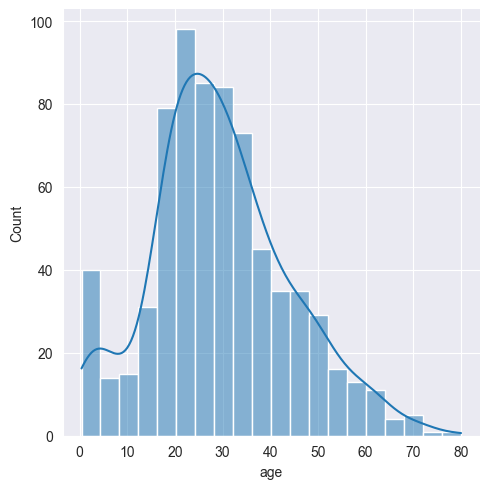

In [15]:
sns.displot(df['age'],kde=True)
# as we can see this data somewhat follows a normal distribution, we chose displot because as age is a numerical column

In [21]:
df["Age_Mean"]=df['age'].fillna(df["age"].mean())
# this above line of code will fill the new column with all the values copied from the age column and where we had NaN it will get filled with the mean value
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


## Median Imputation:
This will work well when we have either right skewed data or left skewed data as there will be outliers and that will result to inappropriate value of the mean


In [25]:
df["age_median"]=df['age'].fillna(df["age"].median())
df[["age_median","age","Age_Mean"]]

,age_median,age,Age_Mean
0,22.0,22.0,22.000000
1,38.0,38.0,38.000000
2,26.0,26.0,26.000000
3,35.0,35.0,35.000000
4,35.0,35.0,35.000000
...,...,...,...
886,27.0,27.0,27.000000
887,19.0,19.0,19.000000
888,28.0,NaN,29.699118
889,26.0,26.0,26.000000


## Mode imputation technique
Works best on categorical values


In [26]:
df[df['embarked'].isnull()]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [27]:
df['embarked'].unique()
# this shows the categorical data values in the embarked column


array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
df['embarked'].mode()
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [38]:
# storing mode we have to store the mode of the column in a variable to apply the fillna() function
mode=df['embarked'].mode()
df['embarked_new']=df['embarked'].fillna(mode[0])
df[['embarked_new','embarked']]

,embarked_new,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [41]:
# to check all the NULL values
df['embarked_new'].isnull().sum()

np.int64(0)

## Random Sampling Technique
We select any random value and then replace the NaN values with it

In [61]:
import numpy as np

# Generate a random integer based on the minimum and maximum values in the 'age' column
random = np.random.randint(df['age'].min(), df['age'].max())

# print(random)

df['age_random']=df['age'].fillna(random)
